In [2]:
%pylab inline
from scipy.special import erf

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Defining functions for computations

In [32]:
def orlicz(x, psi, ts = logspace(-1, 1, 10000)):
    for t in ts:
        d = psi(abs(x)/t)
        m = mean(d)
        if m <= 1:
            return t     
    return np.inf

def subG(x, **qargs):
    f = lambda x: exp(x**2) -1 
    return orlicz(x, f, **qargs)

def subE(x, **qargs):
    f = lambda x: exp(x) -1
    return orlicz(x, f, **qargs)

In [51]:
def subG_(xs, t=linspace(0.01, 1000, 10000)):
    sxs = xs**2
    for j in t:
        d = exp(sxs/j**2)
        if mean(d) <= 2:
            return j        
    return np.inf

def subE_(xs, t = linspace(0.01, 1000, 100000)):
    for j in t:
        d = exp(abs(xs)/j)
        m = mean(d)
        if m <= 2:
            return j
    return np.inf

# Computing subG for Bernouli and Gaussian

(Bernouli)
$$ X \sim Ber(p)$$
where  X = {-1, 1} and p = 1/2  is the parameter of the distribution.

The subGaussian norm denoted $||\cdot||_{\psi_{2}}$, is defined as  $$||X||_{\psi_{2}} = \inf\{t>0 : E[e^{X^{2}/t^{2}}] \le 2\}$$ 

Consider, $$E[e^{X^{2}/t^{2}}] = E[e^{1/t^{2}} ] = e^{1/t^{2}}$$

 
$$\implies  e^{1/t^{2}} \le 2 $$ and 
$$ t = 1/\sqrt{\log 2}$$

hence, 
$$||X||_{\psi_{2}} = \inf\{t>0: E[e^{X^{2}/t^{2}}] \le 2 \} = \frac{1}{\sqrt{\log2}}$$




(Gaussian)
$$ X \sim N(0, 1) $$
 and 
$$||X||_{\psi_{2}} = \inf\{t>0 : E[e^{X^{2}/t^{2}}] \le 2\}$$

we have,

\begin{eqnarray} 
E[e^{X^{2}/t^{2}}] =  \frac{1}{\sqrt{2\pi }}\int_{-\infty}^{+\infty} e^{x^2/t^{2}} e^{-x^{2}/{2}} \,dx 
= \left(1 - \frac{2}{t^{2}}\right)^{\!-1/2} 
\end{eqnarray}

Therefore, 
$$ \left(1 - \frac{2}{t^{2}}\right)^{\!-1/2} \le 2 $$

or 
$$ 1 \le 2 \left( 1 - \frac{2}{t^{2}}\right) $$ 

hence $$||X||_{\psi_{2}} = \inf\{t>0 : E[e^{X^{2}/t^{2}}] \le 2\} = \sqrt{2} $$

In [6]:
r = randn(10000, )

In [7]:
subG(ber, ts=logspace(-3, 1, 10000))


/var/folders/f4/q6n418p95nb77wmf4l9zydddrkwtmh/T/ipykernel_77381/3393977430.py:10: RuntimeWarning: overflow encountered in exp
  f = lambda x: exp(x**2) -1
/Users/duuta/ppp/venv/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


(0.9547682968596055, 1.9951473064122784)

In [26]:
subG_(r, t=logspace(-100, 4, 100000))

/var/folders/f4/q6n418p95nb77wmf4l9zydddrkwtmh/T/ipykernel_77381/401856976.py:4: RuntimeWarning: overflow encountered in exp
  d = exp(sxs/j**2)


1.6421096528392098

In [9]:
subG_(ber, t=logspace(-3, 1, 10000))

/var/folders/f4/q6n418p95nb77wmf4l9zydddrkwtmh/T/ipykernel_73964/401856976.py:4: RuntimeWarning: overflow encountered in exp
  d = exp(sxs/j**2)


1.2020097510386374

In [3]:
1/np.sqrt(log(2))

1.2011224087864498

In [25]:
subG(r, ts = linspace(sqrt(2)/2,2*sqrt(2),10001))

(1.6396392042153667, 0.9993461111228625)

# compute subExponential norm for Bernouli and Gaussian  

(Bernouli)


$$ X \sim Ber(p)$$
where  X = {-1, 1} and p = 1/2  is the parameter of the distribution.

The subGaussian norm denoted $||\cdot||_{\psi_{2}}$, is defined as  $$||X||_{\psi_{1}} = \inf\{t>0 : E[e^{|X|/t}] \le 2\}$$ 

Consider, $$E[e^{|X|/t}] = \frac{1}{2} e^{1/t} + \frac{1}{2}e^{|-1|/t}$$

 
$$\implies  \cosh{\frac{1}{t}} \le 2 $$ and 
$$ 1/ t = \log{ 2}  $$

hence, 
$$||X||_{\psi_{1}} = \inf\{t>0: E[e^{|X|/t}] \le 2 \} = \frac{1}{\log2}$$




(Gaussian)

Given $$ X \sim N(0, 1) $$
 and 
$$||X||_{\psi_{1}} = \inf\{t>0 : E[e^{|X|/t}] \le 2\}$$
we have that,

\begin{eqnarray} 
E[e^{|X|/t}] =  \frac{1}{\sqrt{2\pi }}\int_{-\infty}^{+\infty} e^{|x|/t} e^{-x^{2}/{2}} \,dx 
=  e^{1/2t^{2}}\left(\text{erf}\left(\frac{1}{\sqrt{2}t}\right) + 1 \right)
\end{eqnarray}


$$||X||_{\psi_{1}} = \inf\{t>0: E[e^{|X|/t}] \le 2 \} = e^{1/2t^{2}}\left( \text{erf}\left(\frac{1}{\sqrt{2}t}\right) + 1 \right)$$

In [35]:
subE(ber)

1.4431648135339923

In [36]:
subE(r)

1.3618002555526134

In [46]:
subE_(ber)

1.45

In [47]:
subE_(r)

1.37

In [52]:
log(1)

0.0

In [57]:
1/(2*log(2))

0.7213475204444817

In [60]:
sqrt(1/log(2)/2)

0.8493218002880191

In [70]:
def expectedV(t):
    return exp(1/(2*t**2))*(erf(1/(sqrt(2) * t)) + 1)
    

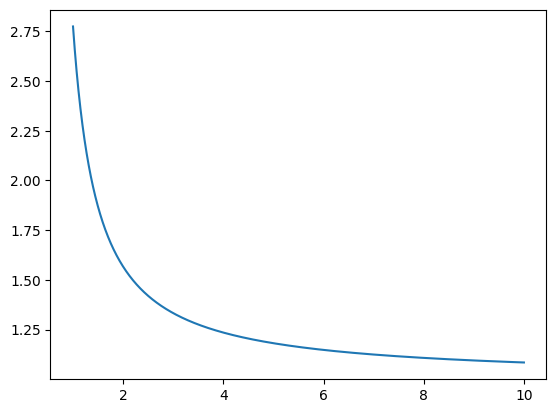

In [78]:
t = logspace(0, 1, 1001)
plot(t, expectedV(t))

In [79]:
expectedV(1.37)

2.002995479202538

In [76]:
t= 2
x = linspace(-10, 10, 1001)
dx = mean(diff(x))
v = exp(abs(x)/t - x**2/2)/ sqrt(2 * pi)
vint = sum(v)*dx
print(vint, expectedV(t), vint/expectedV(t))

1.5670459383730346 1.5670592366928562 0.9999915138371861


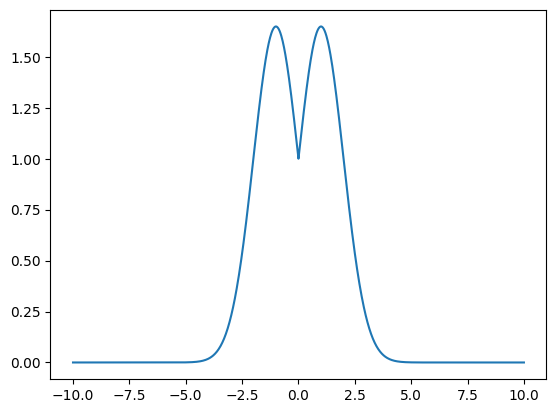

In [72]:
plot(x, v)